# Fase (1): Exploração rápida dos dados

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [4]:
df.Temperature.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [6]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [7]:
df.groupby('fail').mean()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
fail,,,,,,,,,
0,373.150635,3.760436,3.617060,3.484574,5.373866,1.312160,46.299456,4.450091,15.372051
1,212.768448,3.681934,5.318066,2.175573,5.422392,4.987277,48.086514,4.727735,17.676845


In [8]:
df.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [9]:
df.fail.value_counts(normalize=True)

fail
0    0.583686
1    0.416314
Name: proportion, dtype: float64

### Analisando o pairplot entre todas as variáveis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

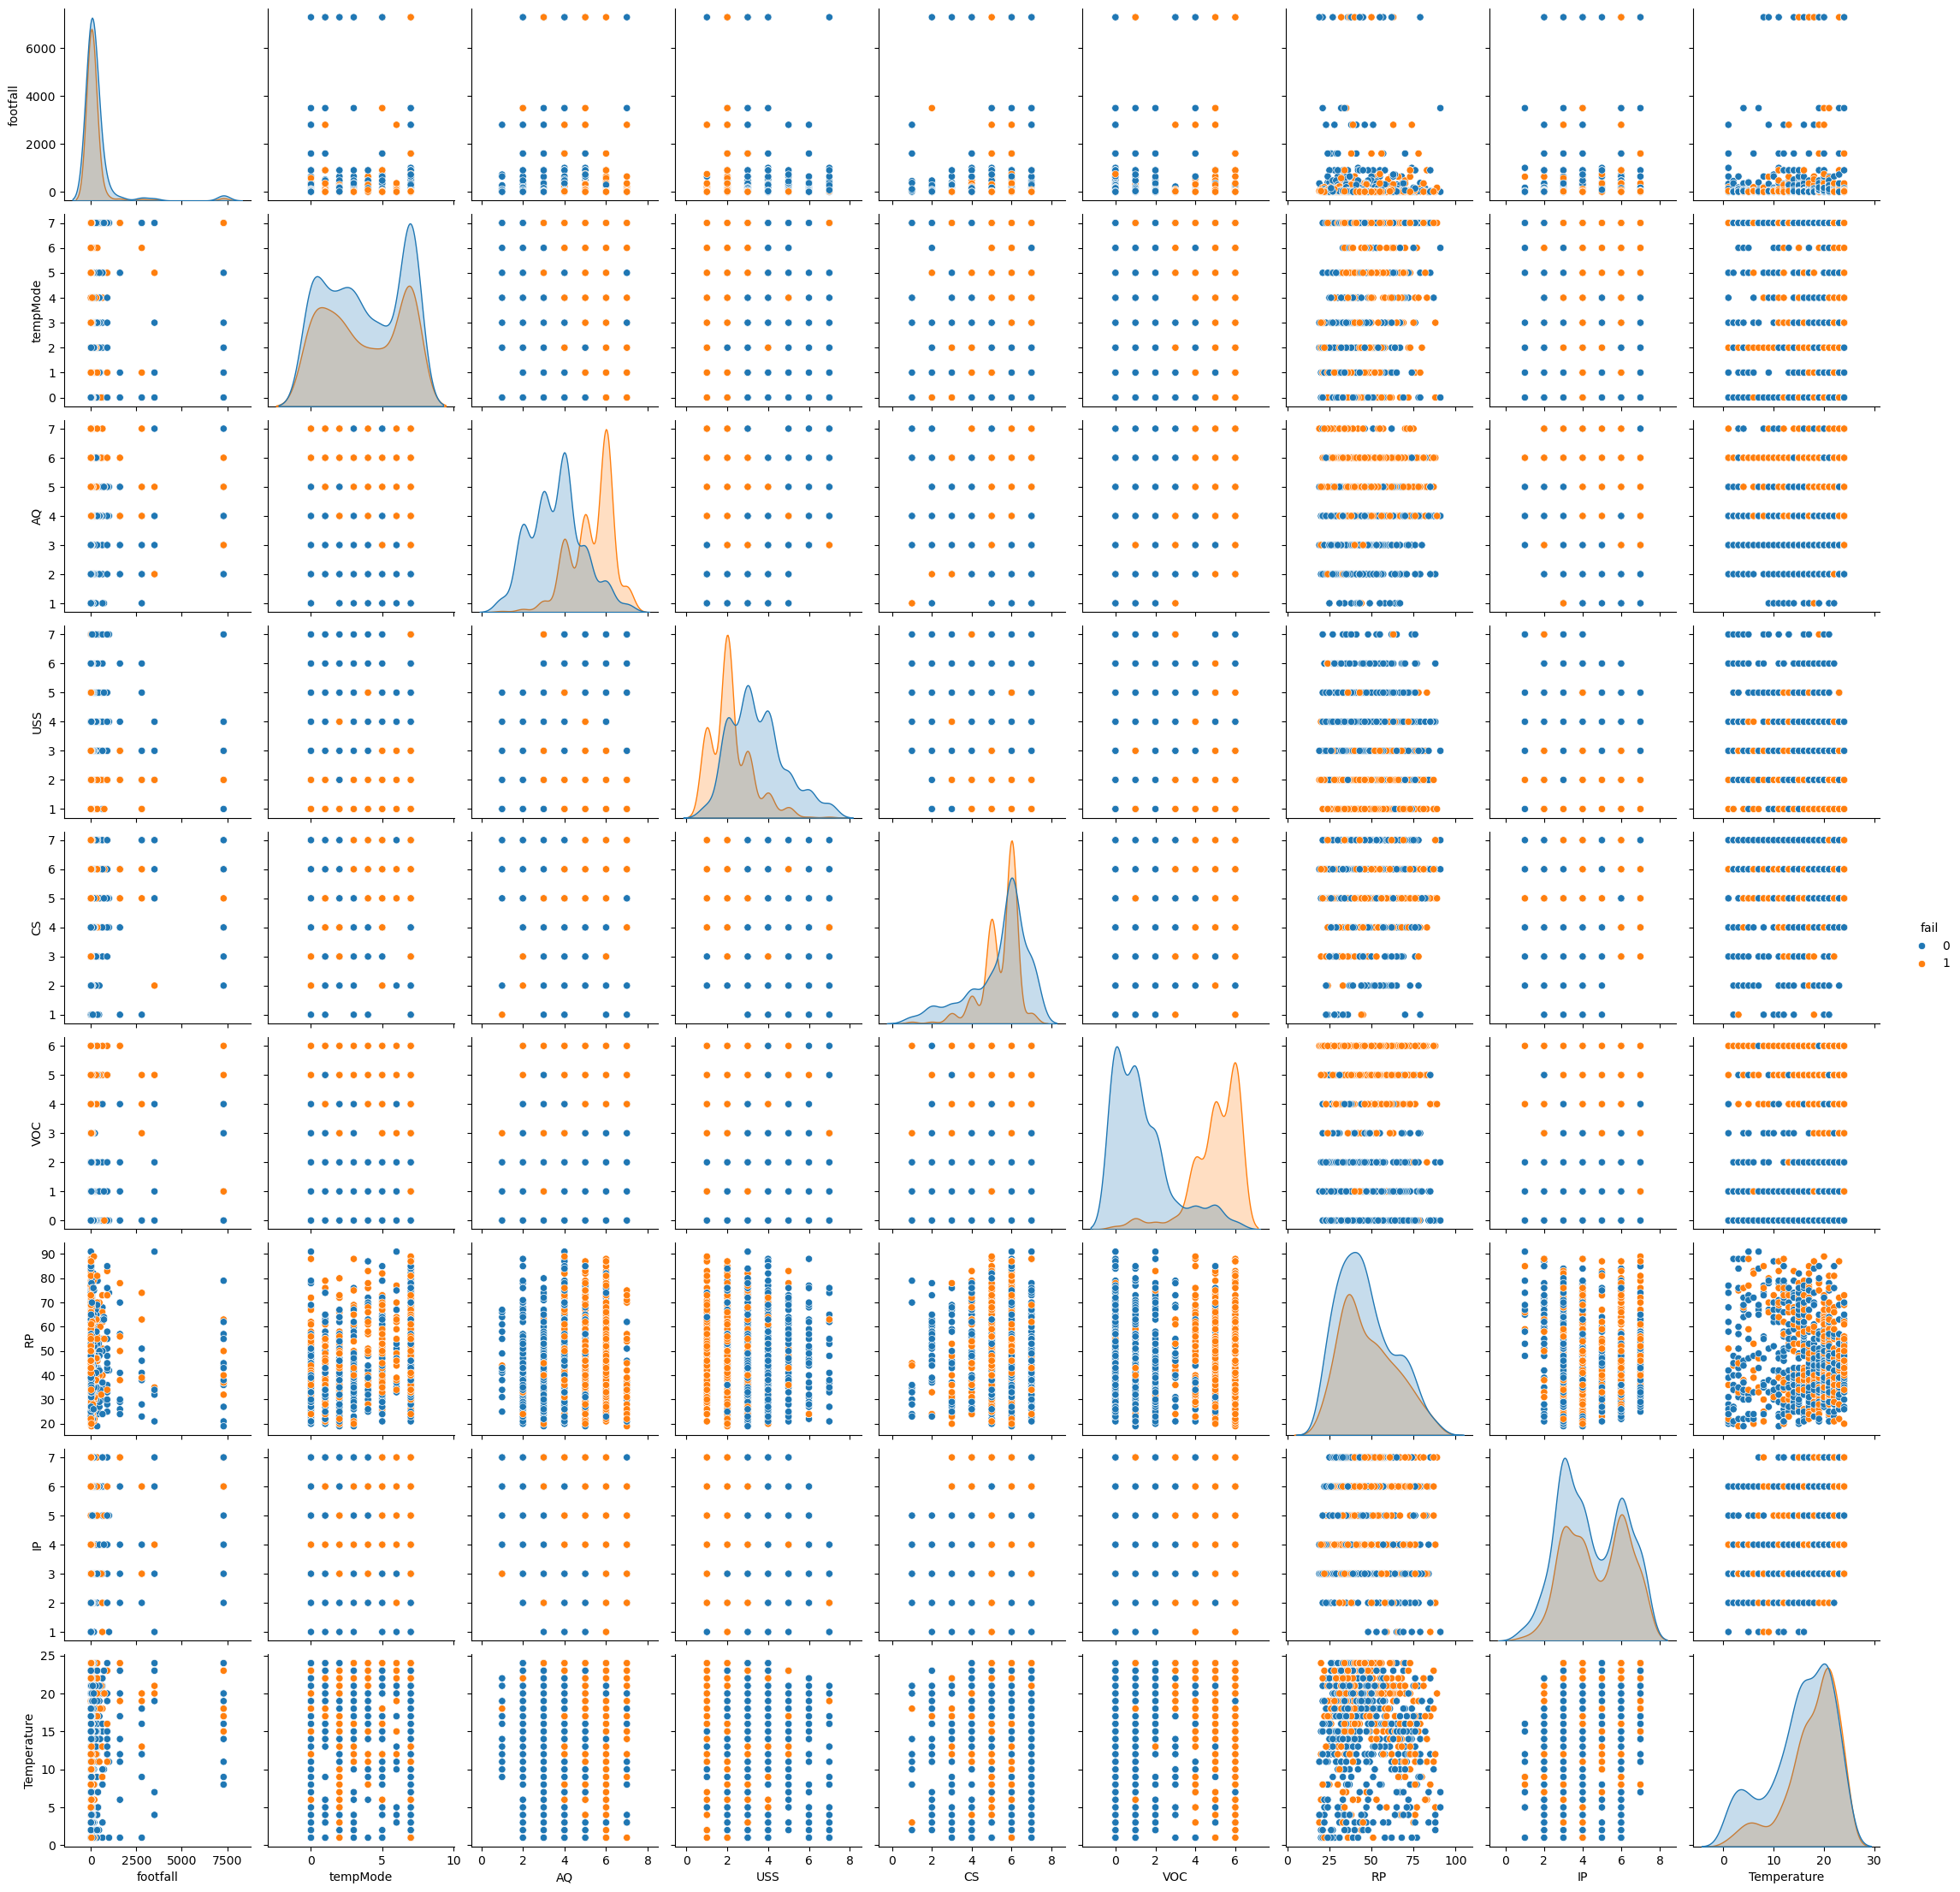

In [11]:
sns.pairplot(data=df, hue='fail')

# Fase (2): Separação dos conjuntos em treino e teste (80-20) e normalização com MinMaxScaler

In [12]:
X = df.drop(columns='fail')
y = df.fail

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=42)

In [14]:
X_train.shape, X_test.shape

((755, 9), (189, 9))

In [15]:
minmax = MinMaxScaler()

minmax.fit(X_train)

X_train_norm = minmax.transform(X_train)
X_test_norm = minmax.transform(X_test)

# Fase (3): Aplicação dos modelos ensemble

### Treinando os três modelos individuais: knn, rede neural, árvore de decisão

In [16]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [17]:
# rede neural
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_norm, y_train)

MLPClassifier(max_iter=500)

In [18]:
# árvore de decisão
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=5)

#### Verificando o desempenho individual de cada um dos classificadores

In [19]:
print(f'knn = {knn.score(X_test_norm, y_test)}')
print(f'mlp = {mlp.score(X_test_norm, y_test)}')
print(f'dt = {dt.score(X_test_norm, y_test)}')

knn = 0.8624338624338624
mlp = 0.873015873015873
dt = 0.8465608465608465


### Voting

In [21]:
from sklearn.ensemble import VotingClassifier

In [22]:
# hard voting
hard = VotingClassifier(estimators=[('knn', knn), ('mlp', mlp), ('dt', dt)],
                       voting='hard',
                       n_jobs=-1)

hard.fit(X_train_norm, y_train)
hard.score(X_test_norm, y_test)

0.873015873015873

In [23]:
# soft voting
soft = VotingClassifier(estimators=[('knn', knn), ('mlp', mlp), ('dt', dt)],
                       voting='soft',
                       n_jobs=-1)

soft.fit(X_train_norm, y_train)
soft.score(X_test_norm, y_test)

0.873015873015873

### Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier

In [27]:
# Usando a árvore de decisão, com 30 árvores
bagging = BaggingClassifier(estimator=dt,
                           n_estimators=30,
                           n_jobs=-1)

bagging.fit(X_train_norm, y_train)
bagging.score(X_test_norm, y_test)

0.8835978835978836

In [28]:
# Usando o knn, com 30 knns
bagging = BaggingClassifier(estimator=knn,
                           n_estimators=30,
                           n_jobs=-1)

bagging.fit(X_train_norm, y_train)
bagging.score(X_test_norm, y_test)

0.8624338624338624

### Boosting
* Adaboost
* Gradient Boosting
* XGBoost

### (1) Adaboost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ada = AdaBoostClassifier(estimator=dt,
                        n_estimators=50)

ada.fit(X_train_norm, y_train)
ada.score(X_test_norm, y_test)

0.8677248677248677

### (2) Gradient Boosting Machine

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbm = GradientBoostingClassifier(n_estimators=50)

gbm.fit(X_train_norm, y_train)
gbm.score(X_test_norm, y_test)

0.8888888888888888

### (3) XGBoost

In [34]:
# !pip install xgboost

In [35]:
from xgboost import XGBClassifier

In [41]:
# Utilizando 50 árvores de decisão
xgb = XGBClassifier(n_estimators=50, max_depth=5)

xgb.fit(X_train_norm, y_train)
xgb.score(X_test_norm, y_test)

0.8624338624338624

### Stacking

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [46]:
stacking = StackingClassifier(estimators=[('knn', knn), ('mlp', mlp), ('dt', dt)],
                             final_estimator=lr,
                             cv=5)

stacking.fit(X_train_norm, y_train)
stacking.score(X_test_norm, y_test)

0.8677248677248677